# Sets of random variables

## Introduction

In Fesslix, sets of random variables can be defined. In this context, a set is a collection of random variables. Sets and random variables are addressed by their unique ID. Each set of random variables has a unique ID of type rvSetID. All random variables within a specific set have a unique ID of type rvID. The full ID (rvFullID) of a random variable is a
combination of the set-ID and its internal ID: `rvSetID::rvID`.

In [1]:
import fesslix as flx
flx.load_engine()
import fesslix.plot as flx_plot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Random Number Generator: MT19937 - initialized with rand()=1560009756;
Random Number Generator: MT19937 - initialized with 1000 initial calls.


## Sets of general random variables
### Definition

```{eval-rst}
.. function:: flx.rv_set

    Syntax:
        ``flx.rv_set( config_set, rv_lst )``

    Description:
        Returns a set of general random variables of type :class:`flx.rvset`.
        
    :param config_set: The following keys are allowed in `config_set`:
    
         - ``name`` (type :type:`rvSetID`): The name of the set of random variables to create.
         - ``is_Nataf`` (*bool*, default: *False*): ``True``: the set is based on the Nataf transformation; ``False``: the set is based on the Rosenblatt transformation.

     In case of the **Rosenblatt transformation** (i.e., for ``config_set['is_Nataf']=False``), additionally, the following keys can be specified:
    
         - ``parents`` (*list*, default: *[]*): A list (of already defined sets or random variables) on which the set to be defined is to be conditioned on. The list entries must be of type :type:`rvSetID`. Used this key if the parameters of random variables in the current set depend on the values of random variables in another set.
         - ``allow_x2y`` (*bool*, default: *False*): By default, only the transformation from standard normal space to original space is supported by this set. However, sometimes the reverse transformation is required – which is more involved from a mathematical and numerical point of view. By setting this parameter to ``True``, the reverse transformation is activated if possible.
     
     In case of the **Nataf transformation** (i.e., for ``config_set['is_Nataf']=True``), additionally, the following keys can be specified:
    
         - ``corr`` (*list*, default: *[]*): A list of correlations. The entries in the list must be of type *dict*; the following keys are allowed:

            - ``rv_1`` (:type:`rvID`): identifier (name) of random variable in current set
            - ``rv_2`` (:type:`rvID`): identifier (name) of random variable in current set (must be different from `rv_1`)
            - ``value`` (*float*): value of the correlation coefficient of the pair of random variables `rv_1` and `rv_2`.
            - ``corr_approx`` (*bool*, default: *True*):  ``True``: an approximate empirical relationship is used to determine the correlation coefficient of the underlying pair of standard Normal random variables. ``False``: this value is evaluated numerically by means of the algorithm described in TODO. This parameter is only relevant if `rhogauss` is set to *False*.
            - ``rhogauss`` (*bool*, default: *False*): If *True*, the specified correlation coefficient is associated with the underlying standard Normal random variables (i.e., the correlation coefficient is applied to the random variables transformed to standard Normal space). Activating this option can reduce the computational costs of assembling the correlation matrix.
     
         - ``is_Nataf_only_once`` (*bool*, default: *True*): If ``True``, the parameters of the marginal distributions of the Nataf transformation are evaluated only once. Only experienced users should consider setting the value of this parameter to ``False``.
     
    :type config_set: dict
    :param rv_lst: A list with configurations for the random variables to create in the set. The list entries must be of type :type:`flx_rv_config`.
    
     In case of the **Rosenblatt transformation** (i.e., for ``config_set['is_Nataf']=False``), additionally, the following keys can be specified for the individual entries:
    
         - ``corr`` (*dict*, *optional*): Defines a correlation coefficient between this random variable and another random variable in the set. The following keys are allowed:

            - ``rv_name`` (:type:`rvID`): identifier (name) of random variable in current set
            - ``value`` (*float*): value of the correlation coefficient of the current random variable with the random variable specified in `rv_name`.
            - ``fix`` (*bool*, default: *False*): ``True``: The correlation coefficient is evaluated a single time and the parameters of the involved random variables are constant. In this case the correlation of the underlying standard normal random variables is a constant and, thus, needs to be evaluated only once. ``False``:  The correlation of the underlying standard normal random variables is not treated as a constant and needs to be evaluated anew every time a new realization is generated. This mode can be computationally demanding – and should be used only if really needed.
         
    :type rv_lst: list
    :rtype: :class:`flx.rvset`
    
```

```{eval-rst}
.. py:type:: rvSetID
   :canonical: Word
   
   Syntax:
       ``Word``

   Description:
       This data-type assigns a unique identifier (of type :type:`Word`) to a set (i.e., a collection) of random variables.
```

### Working with sets of random variables

```{eval-rst}
.. class:: flx.rvset

   A set (i.e., collection) of random variables.

   .. py:method:: get_name()

      Retrieves the name of the set of random variables.

      :returns: name of set
      :rtype: :type:`rvSetID`

   .. py:method:: get_NRV()

      Returns the total number of random variables (in standard Normal space) in the set.

      :rtype: *int*
      
   .. py:method:: get_NOX()

      Returns the total number of random variables (in original space) in the set.

      :rtype: *int*

   .. py:method:: get_values(mode)

      Returns an array of quantities of all entries contained in the set of random variables.

      :param mode: Specifies the mode of the operation. 
      
          The following keywords are allowed:
          
              - ``x``: Return an array with the current realizations of the random variables in the set.
              - ``y``: Return an array with the standard Normal transformed values of the current realizations of the random variables in the set.
              - ``mean``: Return an array with the mean values of the random variables in the set.
              - ``sd``: Return an array with the standard deviations of the random variables in the set.
              
      :type mode: :type:`Word`
      
      :rtype: numpy.ndarray
```

```{eval-rst}
.. function:: flx.get_rv_from_set

    Syntax:
        ``flx.get_rv_from_set( rv_name )``

    Description:
        Retrieve random variable `rv_name` from a set of random variables.
        
    :param rv_name: A unique global identifier of the targeted random variable.
    :type rv_name: :type:`rvFullID`
    :rtype: :class:`flx.rv`
    
```

```{eval-rst}
.. py:type:: rvFullID
   :canonical: str
   
   Syntax:
       ``rvSetID::rvID``
       
       where ``rvSetID`` is of type :type:`rvSetID` and ``rvID`` is of type :type:`rvID`.

   Description:
       This data-type represents a unique global identifier for a random variable.
```

```{eval-rst}
.. function:: FlxFunction.rbrv

    Syntax:
        ``rbrv( rv_name )``

    Description:
        This :type:`FlxFunction` returns the current realization of random variable `rv_name`.
        
    :param rv_name: A unique global identifier of the targeted random variable.
    :type rv_name: :type:`rvFullID`
    
```

### Generating random samples

```{eval-rst}
.. class:: flx.sampler

   Used to generate random realizations from a set (or multiple sets) of random variables.

   .. method:: __init__(config)

      Initialize the `flx.rv` instance using the given configuration.
      
      :param config: The configuration to use for the random variable.
      :type config: :type:`flx_rv_config`

   .. py:method:: sample()

      Generate a random realization for a collection of sets of random variables. The generated realizations can be accessed using :meth:`flx.rv.get_value`, :meth:`flx.rvset.get_values` or :meth:`FlxFunction.rbrv`.

      :rtype: None
      
   .. py:method:: get_NRV()

      Returns the total number of random variables (in standard Normal space) in the collection.

      :rtype: *int*
      
   .. py:method:: get_NOX()

      Returns the total number of random variables (in original space) in the collection.

      :rtype: *int*

   .. py:method:: perform_MCS()
      :no-index:
      
      ... see :func:`flx.sampler.perform_MCS`
```

### Examples

#### Set without dependencies (i.e., parents)

In [2]:
## ================================================================
## Set without dependencies (i.e., parents)
## ================================================================

## ------------------------------------------
## Definition
## ------------------------------------------
config_rv_a1 = { 'name':'rv1', 'type':'stdn' }
config_rv_a2 = { 'name':'rv2', 'type':'logn', 'mu':1., 'sd':2. }
rv_set_a = flx.rv_set( {'name':'rv_set_a'}, [ config_rv_a1, config_rv_a2 ] )

## ------------------------------------------
## Retrieve random variables from the set
## ------------------------------------------
rv_a1 = flx.get_rv_from_set("rv_set_a::rv1")
rv_a2 = flx.get_rv_from_set("rv_set_a::rv2")
print( rv_a1.info() )

## ------------------------------------------
## Generate random samples
## ------------------------------------------
sampler_a = flx.sampler(['rv_set_a'])
for i in range(10):
    sampler_a.sample()
    print(f"sample {i+1:2.0f}: {rv_a1.get_value():8.2f}, {rv_a2.get_value():8.2f}" )

{'type': 'stdn', 'name': 'rv_set_a::rv1', 'mean': 0.0, 'sd': 1.0, 'entropy': 1.4189385332046727}
sample  1:     1.22,     0.11
sample  2:    -0.18,     0.99
sample  3:    -0.88,     0.17
sample  4:    -0.42,     1.12
sample  5:     0.05,     0.37
sample  6:    -0.36,     1.90
sample  7:     0.15,     1.10
sample  8:    -0.33,     0.32
sample  9:    -0.59,     0.23
sample 10:     0.80,     0.42


#### Set that depends on another set

In [3]:
## ================================================================
## Set that depends on 'rv_set_a'
## ================================================================

## ------------------------------------------
## Definition
## ------------------------------------------
config_rv_b1 = { 'name':'rv1', 'type':'normal', 'mu':"rbrv(rv_set_a::rv2)", 'sd':0.1 }
config_rv_b2 = { 'name':'rv2', 'type':'normal', 'mu':"rbrv(rv_set_b::rv1)", 'sd':0.05 }
rv_set_b = flx.rv_set( {'name':'rv_set_b', 'parents':['rv_set_a']}, [ config_rv_b1, config_rv_b2 ] )

## ------------------------------------------
## Retrieve random variables from the set
## ------------------------------------------
rv_b1 = flx.get_rv_from_set("rv_set_b::rv1")
rv_b2 = flx.get_rv_from_set("rv_set_b::rv2")

## ------------------------------------------
## Generate random samples
## ------------------------------------------
sampler_b = flx.sampler(['rv_set_b'])   ## 'rv_set_a' is added implicitly!
for i in range(10):
    sampler_b.sample()
    print(f"sample {i+1:2.0f}: {rv_a1.get_value():8.2f}, {rv_a2.get_value():8.2f}, {rv_b1.mean():8.2f}, {rv_b1.get_value():8.2f}, {rv_b2.mean():8.2f}, {rv_b2.get_value():8.2f}" )

sample  1:     0.72,     0.25,     0.25,     0.14,     0.14,     0.22
sample  2:     0.04,     0.32,     0.32,     0.14,     0.14,     0.19
sample  3:     0.88,     0.50,     0.50,     0.42,     0.42,     0.34
sample  4:     0.18,     0.18,     0.18,     0.21,     0.21,     0.29
sample  5:     1.53,     0.97,     0.97,     1.01,     1.01,     1.10
sample  6:    -0.33,     0.55,     0.55,     0.68,     0.68,     0.68
sample  7:     0.64,    14.90,    14.90,    14.96,    14.96,    14.95
sample  8:    -1.07,     0.28,     0.28,     0.31,     0.31,     0.32
sample  9:    -0.39,     1.65,     1.65,     1.52,     1.52,     1.51
sample 10:     0.18,     1.05,     1.05,     0.98,     0.98,     0.94


#### Set with correlated random variables

In [4]:
## ================================================================
## Set with correlated random variables
## ================================================================

## ------------------------------------------
## Definition
## ------------------------------------------
config_rv_c1 = { 'name':'rv1', 'type':'normal', 'mu':2., 'sd':1. }
config_rv_c2 = { 'name':'rv2', 'type':'stdn', 'corr':{ 'rv_name': 'rv1', 'value':0.95, 'fix':True } }
config_rv_c3 = { 'name':'rv3', 'type':'logn', 'mu':5., 'sd':5., 'corr':{ 'rv_name': 'rv1', 'value':0.7, 'fix':True } }
rv_set_c = flx.rv_set( {'name':'rv_set_c'}, [ config_rv_c1, config_rv_c2, config_rv_c3 ] )

## ------------------------------------------
## Retrieve random variables from the set
## ------------------------------------------
rv_c1 = flx.get_rv_from_set("rv_set_c::rv1")
rv_c2 = flx.get_rv_from_set("rv_set_c::rv2")
rv_c3 = flx.get_rv_from_set("rv_set_c::rv3")

## ------------------------------------------
## Output mean and std.dev. vector
## ------------------------------------------
print( "mean:", rv_set_c.get_values('mean') )
print( "sd:", rv_set_c.get_values('sd') )

## ------------------------------------------
## Generate random samples
## ------------------------------------------
N = 10000   ## number of samples to generate
sampler_c = flx.sampler(['rv_set_c'])  
smpl_mtx = np.empty((N, 3))
for i in range(N):
    sampler_c.sample()
    smpl_mtx[i] = rv_set_c.get_values('x')
    
## ------------------------------------------
## evaluate correlation of sample matrix
## ------------------------------------------
corr_mtx = np.corrcoef( smpl_mtx, rowvar=False )
print(corr_mtx)

mean: [2. 0. 5.]
sd: [1. 1. 5.]
[[1.         0.95065163 0.70417062]
 [0.95065163 1.         0.67001959]
 [0.70417062 0.67001959 1.        ]]


#### Set based on the Nataf transformation

In [5]:
## ================================================================
## Set based on the Nataf transformation
## ================================================================

## ------------------------------------------
## Definition
## ------------------------------------------
config_rv_d1 = { 'name':'rv1', 'type':'normal', 'mu':2., 'sd':1. }
config_rv_d2 = { 'name':'rv2', 'type':'stdn' }
config_rv_d3 = { 'name':'rv3', 'type':'logn', 'mu':5., 'sd':5. }
rv_set_d = flx.rv_set( {'name':'rv_set_d', 
                        'is_Nataf':True, 
                        'allow_x2y':True,
                        'corr': [ {'rv_1':'rv1', 'rv_2':'rv2', 'value':0.95 }, 
                                  {'rv_1':'rv1', 'rv_2':'rv3', 'value':0.7 } , 
                                  {'rv_1':'rv2', 'rv_2':'rv3', 'value':0.8 } 
                                ]
                       }, [ config_rv_d1, config_rv_d2, config_rv_d3 ] )

## ------------------------------------------
## Generate random samples
## ------------------------------------------
N = 10000   ## number of samples to generate
sampler_d = flx.sampler(['rv_set_d'])  
smpl_mtx = np.empty((N, 3))
for i in range(N):
    sampler_d.sample()
    smpl_mtx[i] = rv_set_d.get_values('x')
    
## ------------------------------------------
## evaluate correlation of sample matrix
## ------------------------------------------
corr_mtx = np.corrcoef( smpl_mtx, rowvar=False )
print(corr_mtx)

[[1.         0.94975885 0.70438194]
 [0.94975885 1.         0.80470323]
 [0.70438194 0.80470323 1.        ]]


## Discrete random noise

```{eval-rst}
.. function:: flx.rv_set_noise

    Syntax:
        ``flx.rv_set_noise( config_set, rv_config )``

    Description:
        Creates a set of independent random variables that have all the same distribution.
        
    :param config_set: The following keys are allowed in `config_set`:
    
         - ``name`` (:type:`rvSetID`): The name of the set of random variables to create.
         - ``N`` (*int*): The number of random variables in the set. Value must be larger than *zero*.
         - ``parents`` (*list*, default: *[]*): A list (of already defined sets or random variables) on which the set to be defined is to be conditioned on. The list entries must be of type :type:`rvSetID`. Used this key if the parameters of random variables in the current set depend on the values of random variables in another set.
    :type config_set: dict
    :param rv_config: Defines the distribution underlying all random variables in the set.
    :type rv_config: :type:`flx_rv_config`
    :rtype: :class:`flx.rvset`
    
```
**Example:**

In [6]:
## ================================================================
## Set to represent discrete random noise
## ================================================================

## ------------------------------------------
## Definition
## ------------------------------------------
rv_set_noise = flx.rv_set_noise( { 'name':'rv_set_noise',
                             'N': 5
                           }, { 'type':'logn', 'mu':1., 'sd':0.1} )

## ------------------------------------------
## Generate random samples
## ------------------------------------------
N = 10   ## number of samples to generate
sampler_noise = flx.sampler(['rv_set_noise'])  
for i in range(N):
    sampler_noise.sample()
    print( rv_set_noise.get_values('x') )

[0.94589502 1.1706473  1.17277868 1.04060566 0.99940235]
[1.08901    0.88548543 1.09068705 0.91213917 1.17414009]
[0.97652459 1.13717252 0.94495599 1.01963343 1.03646023]
[0.91989739 0.75221375 0.99927786 1.05738526 0.89523249]
[0.85294404 1.18088069 1.15449764 1.00766392 0.88111   ]
[0.98741572 0.89411355 1.08889349 1.07125965 1.00888081]
[1.10067501 0.97925825 0.92259654 0.94000918 1.23603768]
[0.98036751 1.04242659 0.81890472 1.05350186 1.02121676]
[1.10135354 0.95400611 1.04717208 1.04881268 1.07401229]
[1.07200013 0.93470727 1.01225476 1.14852442 1.06368059]


## Discrete random process with given correlation structure

```{eval-rst}
.. function:: flx.rv_set_proc

    Syntax:
        ``flx.rv_set_proc( config_set, rv_config )``

    Description:
        Creates a set of independent random variables that have all the same distribution.
        
    :param config_set: The following keys are allowed in `config_set`:
    
         - ``name`` (:type:`rvSetID`): The name of the set of random variables to create.
         - ``N`` (*int*): The number of random variables in the set. Value must be larger than *zero*.
         - ``parents`` (*list*, default: *[]*): A list (of already defined sets or random variables) on which the set to be defined is to be conditioned on. The list entries must be of type :type:`rvSetID`. Used this key if the parameters of random variables in the current set depend on the values of random variables in another set.
         - ``rho`` (:type:`flxPara`): The auto-correlation coefficient function.  RHO should be a :type:`FlxFunction` that depends on the :ref:`content:FlxFunction:special` ``gx`` (cooridnate of first point), ``gx2`` (coordinate of second point), and/or ``deltax`` (distance between first and second point).
         - ``dx`` (*float*, default: 1.0): The "distance" between two subsequent points; relevant for evaluating `rho`. Value must be positive.
         - ``M`` (*int*, default: 0):  If this parameter equals ``0``, the Cholesky-decomposition is applied and the set will contain `N` random variables. If ``M > 0``, then the EOLE method is used and `M` specifies the number of independent random variables in the set.
         - ``evtype`` (*int*, default: 2):  This parameter is only relevant if the EOLE method is applied; i.e., for ``M > 0``. For ``evtype=1``, the matrix eigenvalue problem is solved by meansof Lanczos-methods. For ``evtype=2``, the full matrix eigenvalue problem is solved.
         - ``only_once`` (*bool*, default: *True*):   If *True*, the correlation matrix is assembled based on ``RHO`` only once. If *False*, the correlation matrix is assembled anew for each realization. The second option can be of relevance, if the auto-correlation coefficient function depends on random variables contained in one of the parent sets. However, note that assembling the correlation matrix can be computationally demanding.
         - ``rhogauss`` (*bool*, default: *False*):   If *True*, the auto-correlation coefficient function ``RHO`` is associated with the underlying Gaussian process - and not with the actual stochastic process. Activating this option can reduce the computational costs of assembling the correlation matrix.
    :type config_set: dict
    :param rv_config: Defines the distribution underlying all random variables in the set.
    :type rv_config: :type:`flx_rv_config`
    :rtype: :class:`flx.rvset`
    
```
**Example:**

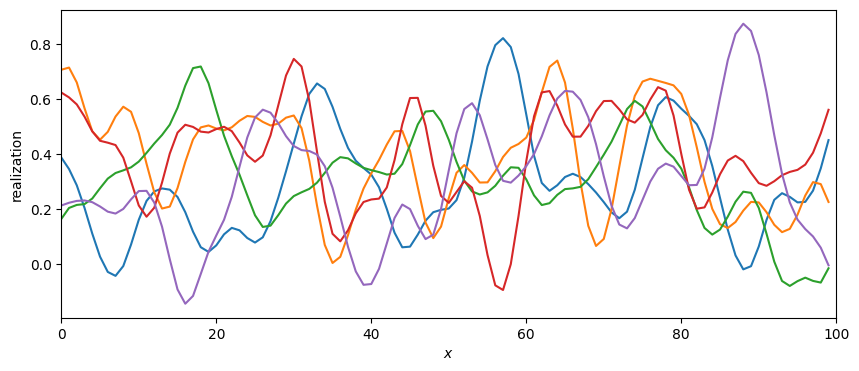

In [7]:
## ================================================================
## rv_set_proc with Cholesky-decomposition
## ================================================================

## ------------------------------------------
## Definition
## ------------------------------------------
rv_set_proc_1 = flx.rv_set_proc( { 'name':'proc_1',
                                   'N': 100,
                                   'rho': "exp(-0.5*(deltax/3)^2)",
                                   'dx': 1.
                                 }, { 'type':'normal', 'mu':0.3, 'sd':0.2} )

## ------------------------------------------
## Generate and plot the random samples
## ------------------------------------------
N = 5   ## number of samples to generate
fig, ax = plt.subplots(figsize=(10, 4))
x_vec_1 = np.arange(100)
sampler_proc_1 = flx.sampler(['proc_1'])  
for i in range(N):
    sampler_proc_1.sample()
    ax.plot( x_vec_1, rv_set_proc_1.get_values('x') )
ax.set_xlim([0., 100.])
plt.xlabel(r"$x$")
plt.ylabel(r"realization")
plt.show()

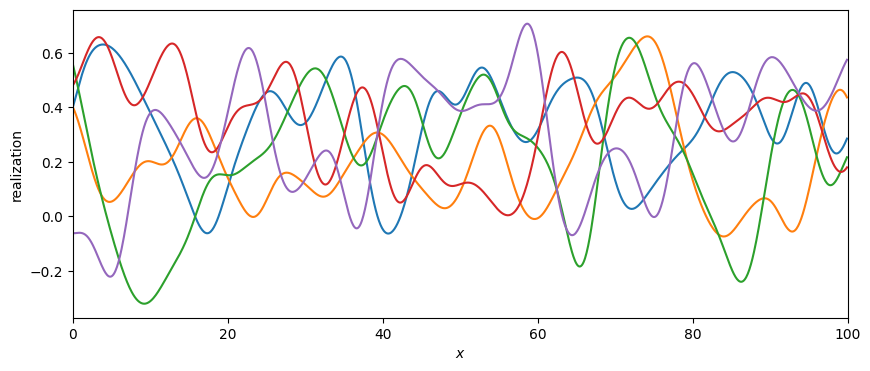

In [8]:
## ================================================================
## rv_set_proc employing EOLE
## ================================================================

## ------------------------------------------
## Definition
## ------------------------------------------
rv_set_proc_2 = flx.rv_set_proc( { 'name':'proc_2',
                                   'N': 1000,
                                   'rho': "exp(-0.5*(deltax/3)^2)",
                                   'dx': 0.1,
                                   'M': 100,
                                   'evtype': 2
                                 }, { 'type':'normal', 'mu':0.3, 'sd':0.2} )

## ------------------------------------------
## Generate and plot the random samples
## ------------------------------------------
N = 5   ## number of samples to generate
fig, ax = plt.subplots(figsize=(10, 4))
x_vec_2 = np.arange(1000)/10.
sampler_proc_2 = flx.sampler(['proc_2'])  
for i in range(N):
    sampler_proc_2.sample()
    ax.plot( x_vec_2, rv_set_proc_2.get_values('x') )
ax.set_xlim([0., 100.])
plt.xlabel(r"$x$")
plt.ylabel(r"realization")
plt.show()

## Gaussian process with given power spectral density function

```{eval-rst}
.. function:: flx.rv_set_psd

    Syntax:
        ``flx.rv_set_psd( config_set )``

    Description:
        Creates a Gaussian process with given power spectral density function.
        
    :param config_set: The following keys are allowed in `config_set`:
    
         - ``name`` (:type:`rvSetID`): The name of the set of random variables to create.
         - ``N`` (*int*): The number of intervals used when approximating the power spectral density. Note: 3*N independent standard Normal random variables are created.  Must be a positive integer.
         - ``parents`` (*list*, default: *[]*): A list (of already defined sets or random variables) on which the set to be defined is to be conditioned on. The list entries must be of type :type:`rvSetID`. Used this key if the parameters of random variables in the current set depend on the values of random variables in another set.
         - ``psd`` (:type:`flxPara`): The power spectral density function.  psd can be a :type:`FlxFunction` that depends on the :ref:`content:FlxFunction:special` ``gx`` (frequency value).
         - ``lb`` (*float*): Lower bound for discretization of the power spectral density function in the frequency domain.
         - ``ub`` (*float*): Upper bound for discretization of the power spectral density function in the frequency domain.
    :type config_set: dict
    :rtype: :class:`flx.rvset`
    
```

```{eval-rst}
.. py:classmethod:: flx.rv_set.eval_rp_psd

    Syntax:
        ``flx.rv_set.eval_rp_psd( t_vec )``

    Description:
        Evaluates the realization of a random process with given power spectral density function.

    This function is a method of class :class:`flx.rv_set` that requires the underlying process to be defined using :meth:`flx.rv_set_psd`; .i.e, the process needs to be associated with a power spectral density function.
        
    :param t_vec: Vector with time-points at which to evaluate the realization of the random process.
    :type t_vec: numpy.ndarray
    :return: The realizations associated with `t_vec`.
    :rtype: numpy.ndarray
    
```
**Example:**

In [9]:
## ================================================================
## Gaussian process with given power spectral density function
## ================================================================

## ------------------------------------------
## Definition
## ------------------------------------------
flx.set_const( 'sd', 2. )
flx.set_var( 'psd_1', "(sd/sqrt(18))^2" )
rv_set_psd_1 = flx.rv_set_psd( { 'name':'psd_1',
                                   'N': 100,
                                   'psd': "psd_1",
                                   'lb': 1.0,
                                   'ub': 10.0
                                 } )
flx.set_const( 'corr_l', 1. )
ub = flx.eval_fun("5./(2*pi*corr_l)")
flx.set_var( 'psd_2', "sd^2*sqrt(2*pi)*corr_l*exp(-2*(pi*corr_l*gx)^2)" )
rv_set_psd_2 = flx.rv_set_psd( { 'name':'psd_2',
                                   'N': 100,
                                   'psd': "psd_2",
                                   'lb': 0.0,
                                   'ub': ub
                                 } )

In [10]:
## ------------------------------------------
## estimate standard deviation
## ------------------------------------------
sampler_psd_1 = flx.sampler(['psd_1'])  
sampler_psd_2 = flx.sampler(['psd_2'])  
N = 2000   ## number of samples to generate
smpl_vec_1 = np.empty(N)
smpl_vec_2 = np.empty(N)
for i in range(N):
    sampler_psd_1.sample()
    sampler_psd_2.sample()
    smpl_vec_1[i] = rv_set_psd_1.eval_rp_psd([0.])[0]
    smpl_vec_2[i] = rv_set_psd_2.eval_rp_psd([0.])[0]
    
print( f"sample std.dev.: {np.std(smpl_vec_1):.2f}, {np.std(smpl_vec_2):.2f}" )

sample std.dev.: 2.00, 1.98


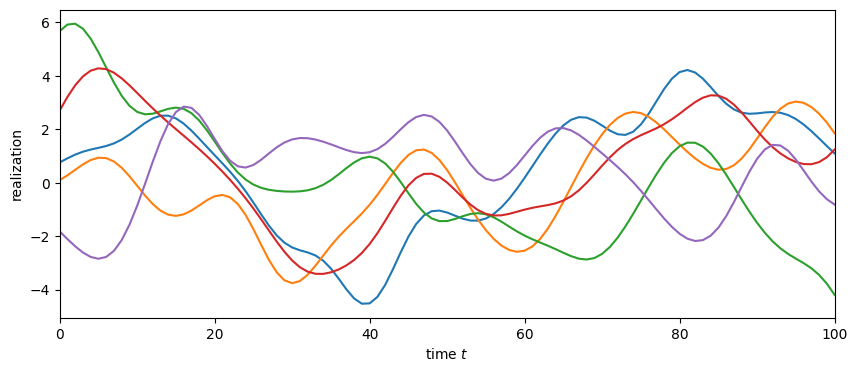

In [11]:
## ------------------------------------------
## Generate and plot the random samples
## ------------------------------------------
N = 5   ## number of samples to generate
t_max = 100.
fig, ax = plt.subplots(figsize=(10, 4))
t_vec_1 = np.arange(101)*(t_max/100)
for i in range(N):
    sampler_psd_1.sample()
    sampler_psd_2.sample()
    rp_smpl_1 = rv_set_psd_1.eval_rp_psd(t_vec_1)
    rp_smpl_2 = rv_set_psd_2.eval_rp_psd(t_vec_1)
    ax.plot( t_vec_1, rp_smpl_2 )
ax.set_xlim([0., t_max])
plt.xlabel(r"time $t$")
plt.ylabel(r"realization")
plt.show()

## Random point uniformly distributed in hpyer-sphere

```{eval-rst}
.. function:: flx.rv_set_sphere

    Syntax:
        ``flx.rv_set_sphere( config_set )``

    Description:
        Creates a random point that is uniformly distribted in a hyper-sphere.
        
    :param config_set: The following keys are allowed in `config_set`:
    
         - ``name`` (:type:`rvSetID`): The name of the set of random variables to create.
         - ``N`` (*int*): The dimension of the hyper-sphere (equals the number of random varibles in the set). Must be a positive integer.
         - ``radius`` (:type:`flxPara`): The radius of the hyper-sphere.
         - ``parents`` (*list*, default: *[]*): A list (of already defined sets or random variables) on which the set to be defined is to be conditioned on. The list entries must be of type :type:`rvSetID`. Used this key if the parameters of random variables in the current set depend on the values of random variables in another set.
    :type config_set: dict
    :rtype: :class:`flx.rvset`
    
```
**Example:**

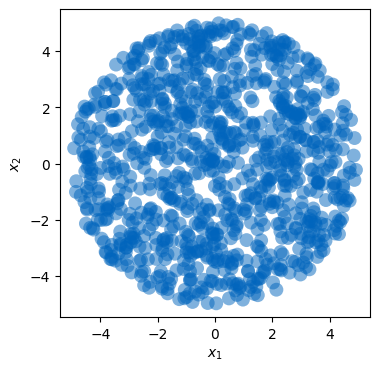

In [12]:
## ================================================================
## Random point uniformly distributed in hpyer-sphere
## ================================================================

## ------------------------------------------
## Definition
## ------------------------------------------
rv_set_sphere = flx.rv_set_sphere( { 'name':'sphere',
                                   'N': 2,
                                   'radius': 5.,
                                 } )

## ------------------------------------------
## Generate and plot the random samples
## ------------------------------------------
N = 1000   ## number of samples to generate
fig, ax = plt.subplots(figsize=(4, 4))
sampler_sphere = flx.sampler(['sphere'])  
for i in range(N):
    sampler_sphere.sample()
    smpl_vec = rv_set_sphere.get_values()
    ax.scatter( smpl_vec[0], smpl_vec[1], color=flx_plot.color_tumblue, s=100, alpha=0.5, edgecolors='none' )
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.show()

## Vector function of random variables

```{eval-rst}
.. function:: flx.rv_set_vfun

    Syntax:
        ``flx.rv_set_vfun( config_set )``

    Description:
        Creates a vector that is an explicit function of random variables.
        
    :param config_set: The following keys are allowed in `config_set`:
    
         - ``name`` (:type:`rvSetID`): The name of the set of random variables to create.
         - ``N`` (*int*): The dimension of the vector returned by the vector function. Must be a positive integer.
         - ``vecfun`` (:type:`flxVecPara`): The vector function to evaluate. Must evaluate to an array of size `N`.
         - ``parents`` (*list*, default: *[]*): A list (of already defined sets or random variables) on which the set to be defined is to be conditioned on. The list entries must be of type :type:`rvSetID`. Used this key if the parameters of random variables in the current set depend on the values of random variables in another set.
    :type config_set: dict
    :rtype: :class:`flx.rvset`
    
```
**Example:**

In [13]:
## ================================================================
## Vector function of random variables
## ================================================================

## ------------------------------------------
## Parent set
## ------------------------------------------
rv_set_noise4vfun = flx.rv_set_noise( { 'name':'rv_set_noise4vfun',
                             'N': 5
                           }, { 'type':'logn', 'lambda':0., 'zeta':1.} )

## ------------------------------------------
## Definition V1
## ------------------------------------------
def vfun_1_map():
    y_vec = rv_set_noise4vfun.get_values('y')
    return np.exp( y_vec )
rv_set_vfun_1 = flx.rv_set_vfun( { 'name':'vfun_1',
                                   'N': 5,
                                   'vecfun': vfun_1_map,
                                   'parents': [ 'rv_set_noise4vfun' ]
                                 } )

## ------------------------------------------
## Generate random samples
## ------------------------------------------
N = 10   ## number of samples to generate
sampler_vfun_1 = flx.sampler(['vfun_1'])
print( sampler_vfun_1.get_NRV(), sampler_vfun_1.get_NOX() )
for i in range(N):
    sampler_vfun_1.sample()
    print( rv_set_vfun_1.get_values('x'), rv_set_noise4vfun.get_values('x') )

5 10
[0.39651839 0.27464682 0.16920621 0.79282761 2.97638527] [0.39651839 0.27464682 0.16920621 0.79282761 2.97638527]
[0.80132072 2.64027985 0.50819311 1.13186406 0.83757866] [0.80132072 2.64027985 0.50819311 1.13186406 0.83757866]
[1.28569324 1.36032855 2.11677245 9.70626954 0.32256192] [1.28569324 1.36032855 2.11677245 9.70626954 0.32256192]
[0.30268825 1.01417219 0.31271108 0.73463447 2.49137429] [0.30268825 1.01417219 0.31271108 0.73463447 2.49137429]
[0.25310937 0.56826222 0.32668157 3.92892234 3.64601408] [0.25310937 0.56826222 0.32668157 3.92892234 3.64601408]
[0.32228404 4.96468669 0.59086697 2.61213067 1.35551462] [0.32228404 4.96468669 0.59086697 2.61213067 1.35551462]
[0.68035038 0.21921928 2.85858228 0.8258929  0.32112489] [0.68035038 0.21921928 2.85858228 0.8258929  0.32112489]
[3.05103554 1.88639308 0.42374091 0.52290173 0.37310738] [3.05103554 1.88639308 0.42374091 0.52290173 0.37310738]
[2.28384769 2.27190074 5.63325656 0.22032354 2.84610972] [2.28384769 2.27190074 5.6

In [14]:
## ------------------------------------------
## Definition V2
## ------------------------------------------
rv_set_vfun_2 = flx.rv_set_vfun( { 'name':'vfun_2',
                                   'N': 5,
                                   'vecfun': """
                                      my_vec={
                                         rbrv_vec_get y: my_vec = "rv_set_noise4vfun";
                                         mtxconst_op my_vec(x) = exp(x);
                                      }
                                      """,
                                   'parents': [ 'rv_set_noise4vfun' ]
                                 } )

## ------------------------------------------
## Generate random samples
## ------------------------------------------
sampler_vfun_2 = flx.sampler(['vfun_2'])
for i in range(N):
    sampler_vfun_2.sample()
    print( rv_set_vfun_2.get_values('x'), rv_set_noise4vfun.get_values('x') )

[1.07784152 1.08137615 1.71356094 1.25178479 1.67640195] [1.07784152 1.08137615 1.71356094 1.25178479 1.67640195]
[4.01229517 0.90949821 5.40010063 0.18606548 0.2179596 ] [4.01229517 0.90949821 5.40010063 0.18606548 0.2179596 ]
[ 3.22605717  1.20772528  0.33380058 15.29847497  0.58905656] [ 3.22605717  1.20772528  0.33380058 15.29847497  0.58905656]
[1.92390178 1.32302977 0.5230598  1.18985919 0.39446354] [1.92390178 1.32302977 0.5230598  1.18985919 0.39446354]
[0.37463919 0.29836854 2.56276337 0.36399915 0.83272279] [0.37463919 0.29836854 2.56276337 0.36399915 0.83272279]
[1.70792161 0.17188171 0.68363852 2.96096384 0.16238325] [1.70792161 0.17188171 0.68363852 2.96096384 0.16238325]
[0.44177006 3.8903314  0.34581529 2.9632092  0.7972051 ] [0.44177006 3.8903314  0.34581529 2.9632092  0.7972051 ]
[0.08816772 3.7532894  0.81931844 1.2251566  1.57918787] [0.08816772 3.7532894  0.81931844 1.2251566  1.57918787]
[0.2676124  0.36319135 1.77538773 0.32843259 5.31706164] [0.2676124  0.3631913

In [15]:
import time
## ------------------------------------------
## measure performance
## ------------------------------------------
N = int(1e6)

start_time_1 = time.perf_counter()
for i in range(N):
    sampler_vfun_1.sample()
end_time_1 = time.perf_counter()
print(f"Runtime [1]: {end_time_1 - start_time_1:.6f} seconds")

start_time_2 = time.perf_counter()
for i in range(N):
    sampler_vfun_2.sample()
end_time_2 = time.perf_counter()
print(f"Runtime [2]: {end_time_2 - start_time_2:.6f} seconds")

Runtime [1]: 10.905421 seconds
Runtime [2]: 3.842884 seconds


## Dirichlet distribution

```{eval-rst}
.. function:: flx.rv_set_dirichlet

    Syntax:
        ``flx.rv_set_dirichlet( config_set )``

    Description:
        Creates a vector that is the outcome of a Dirichlet distributed random variable.
        
    :param config_set: The following keys are allowed in `config_set`:
    
         - ``name`` (:type:`rvSetID`): The name of the set of random variables to create.
         - ``N`` (*int*): The dimension of the hyper-sphere (equals the number of random variables in the set). Must be a positive integer.
         - ``alpha`` (numpy.ndarray): The parameter vector of the Dirichlet distribution. Must be of size `N`.
         - ``parents`` (*list*, default: *[]*): A list (of already defined sets or random variables) on which the set to be defined is to be conditioned on. The list entries must be of type :type:`rvSetID`. Used this key if the parameters of random variables in the current set depend on the values of random variables in another set.
    :type config_set: dict
    :rtype: :class:`flx.rvset`
    
```
**Example:**

In [16]:
## ================================================================
## Dirichlet distribution
## ================================================================

## ------------------------------------------
## Definition
## ------------------------------------------
rv_set_dirichlet = flx.rv_set_dirichlet( { 'name':'dirichlet',
                                   'alpha': [ 2., 4., 5. ]
                                 } )

In [17]:
## ------------------------------------------
## Generate samples
## ------------------------------------------
N = 10   ## number of samples to generate
sampler_dirichlet = flx.sampler(['dirichlet'])  
for i in range(N):
    sampler_dirichlet.sample()
    smpl_vec = rv_set_dirichlet.get_values()
    print( smpl_vec, sum(smpl_vec) )

[0.12101713 0.41896398 0.46001889] 1.0
[0.22545202 0.36049316 0.41405482] 1.0
[0.05450286 0.31149378 0.63400337] 0.9999999999999999
[0.37982985 0.32992108 0.29024907] 1.0
[0.16293104 0.37402577 0.46304319] 0.9999999999999999
[0.04491904 0.17269528 0.78238568] 1.0
[0.02920311 0.15920726 0.81158963] 1.0
[0.04535025 0.47740138 0.47724836] 1.0
[0.09934868 0.34514529 0.55550603] 1.0
[0.35034517 0.35699314 0.29266169] 1.0


## Multinomial distribution

```{eval-rst}
.. function:: flx.rv_set_multinomial

    Syntax:
        ``flx.rv_set_multinomial( config_set )``

    Description:
        Creates a vector that is the outcome of a multinomially distributed random variable.
        
    :param config_set: The following keys are allowed in `config_set`:
    
         - ``name`` (:type:`rvSetID`): The name of the set of random variables to create.
         - ``N`` (*int*): The dimension of the vector returned by the vector function. Must be a positive integer.
         - ``pvec`` (:type:`flxVecPara`): The vector function to evaluate. Must evaluate to an array of size `N`.
         - ``Ntrial`` (*int*): The number of trials. Must be a positive integer.
         - ``parents`` (*list*, default: *[]*): A list (of already defined sets or random variables) on which the set to be defined is to be conditioned on. The list entries must be of type :type:`rvSetID`. Used this key if the parameters of random variables in the current set depend on the values of random variables in another set.
    :type config_set: dict
    :rtype: :class:`flx.rvset`
    
```
**Example:**

In [18]:
## ================================================================
## Multinomial distribution
## ================================================================

## ------------------------------------------
## Definition (without parents)
## ------------------------------------------
rv_set_multinomial_1 = flx.rv_set_multinomial( { 'name':'multinomial_1',
                                   'pvec': [ 0.3, 0.2, 0.5 ],
                                   'N': 3,
                                   'Ntrial': 100
                                 } )
## ------------------------------------------
## Generate samples
## ------------------------------------------
N = 10   ## number of samples to generate
sampler_multinomial_1 = flx.sampler(['multinomial_1'])  
for i in range(N):
    sampler_multinomial_1.sample()
    smpl_vec = rv_set_multinomial_1.get_values()
    print( smpl_vec, sum(smpl_vec) )

[25. 22. 53.] 100.0
[36. 17. 47.] 100.0
[28. 20. 52.] 100.0
[32. 17. 51.] 100.0
[28. 20. 52.] 100.0
[31. 20. 49.] 100.0
[29. 17. 54.] 100.0
[31. 25. 44.] 100.0
[38. 24. 38.] 100.0
[32. 17. 51.] 100.0


In [19]:
## ------------------------------------------
## Definition (with a parent)
## ------------------------------------------
def multinomial_2_map():
    return rv_set_dirichlet.get_values('x')
rv_set_multinomial_2 = flx.rv_set_multinomial( { 'name':'multinomial_2',
                                   'pvec': multinomial_2_map,
                                   'N': 3,
                                   'Ntrial': 100,
                                   'parents': [ 'dirichlet' ]
                                 } )
## ------------------------------------------
## Generate samples
## ------------------------------------------
N = 10   ## number of samples to generate
sampler_multinomial_2 = flx.sampler(['multinomial_2'])  
for i in range(N):
    sampler_multinomial_2.sample()
    smpl_vec = rv_set_multinomial_2.get_values()
    pr_vec = rv_set_dirichlet.get_values()
    print( smpl_vec, sum(smpl_vec), pr_vec )

[24. 16. 60.] 100.0 [0.17901284 0.18127061 0.63971654]
[ 2. 43. 55.] 100.0 [0.01605471 0.52021131 0.46373397]
[23. 43. 34.] 100.0 [0.22559983 0.4338569  0.34054327]
[16. 22. 62.] 100.0 [0.12961198 0.28111529 0.58927273]
[ 9. 32. 59.] 100.0 [0.1550041  0.34453913 0.50045677]
[19. 30. 51.] 100.0 [0.16702701 0.22785146 0.60512153]
[ 4. 84. 12.] 100.0 [0.08088446 0.80518614 0.1139294 ]
[22. 40. 38.] 100.0 [0.26254205 0.30079937 0.43665858]
[ 5. 47. 48.] 100.0 [0.17037024 0.37519233 0.45443743]
[ 9. 11. 80.] 100.0 [0.1496303  0.08613652 0.76423318]


In [20]:
## ------------------------------------------
## Definition (with a parent)
## ------------------------------------------
rv_set_multinomial_3 = flx.rv_set_multinomial( { 'name':'multinomial_3',
                                   'pvec': """
                                       my_vec={
                                         rbrv_vec_get x: my_vec = "dirichlet";
                                       }
                                       """,
                                   'N': 3,
                                   'Ntrial': 100,
                                   'parents': [ 'dirichlet' ]
                                 } )
## ------------------------------------------
## Generate samples
## ------------------------------------------
N = 10   ## number of samples to generate
sampler_multinomial_3 = flx.sampler(['multinomial_3'])  
for i in range(N):
    sampler_multinomial_3.sample()
    smpl_vec = rv_set_multinomial_3.get_values()
    pr_vec = rv_set_dirichlet.get_values()
    print( smpl_vec, sum(smpl_vec), pr_vec )

[ 2. 57. 41.] 100.0 [0.04981998 0.55716176 0.39301826]
[ 7. 68. 25.] 100.0 [0.10515272 0.64676385 0.24808343]
[ 6. 40. 54.] 100.0 [0.06552406 0.35920383 0.57527211]
[37. 38. 25.] 100.0 [0.33663602 0.40562414 0.25773983]
[16. 33. 51.] 100.0 [0.13351948 0.33654782 0.52993271]
[ 6. 31. 63.] 100.0 [0.07645908 0.34918083 0.57436009]
[14. 41. 45.] 100.0 [0.12807671 0.42526592 0.44665737]
[12. 28. 60.] 100.0 [0.05638492 0.24444839 0.69916669]
[ 2. 78. 20.] 100.0 [0.04464577 0.75458632 0.20076792]
[15. 42. 43.] 100.0 [0.12087873 0.44396796 0.43515331]


In [21]:
## ------------------------------------------
## measure performance
## ------------------------------------------
N = int(1e5)

start_time_1 = time.perf_counter()
for i in range(N):
    sampler_multinomial_1.sample()
end_time_1 = time.perf_counter()
print(f"Runtime [1]: {end_time_1 - start_time_1:.6f} seconds")

start_time_2 = time.perf_counter()
for i in range(N):
    sampler_multinomial_2.sample()
end_time_2 = time.perf_counter()
print(f"Runtime [2]: {end_time_2 - start_time_2:.6f} seconds")

start_time_3 = time.perf_counter()
for i in range(N):
    sampler_multinomial_3.sample()
end_time_3 = time.perf_counter()
print(f"Runtime [3]: {end_time_3 - start_time_3:.6f} seconds")

Runtime [1]: 3.506022 seconds
Runtime [2]: 5.090040 seconds
Runtime [3]: 4.337881 seconds
